In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def rho(r,Mh,c):
    rho_m = 5.27E10 #Solas masses / Mpc^3
    r_200 = (3.*Mh/(200.*rho_m*4.*np.pi))**(1/3.)
    rs = r_200/c
    rho_0 = Mh/(4.*np.pi*rs**3.*(np.log(1.+c) - c/(1.+c)))
    rho_r = rho_0/((r/rs)*(1.+ r/rs)**2.)
    return rho_r
h = 0.7

In [21]:
rho_m = 5.27E10
c = 6
Mh = 1E13
r_200 =(3.*Mh/(200.*rho_m*4.*np.pi))**(1/3.)
rs = r_200/c
rho_0 = Mh/(4.*np.pi*rs**3.*(np.log(1.+c) - c/(1.+c)))


print 'r_200 =',r_200
print 'rs =',rs
print 'rho_0 =',rho_0

r_200 = 0.609570011549
rs = 0.101595001925
rho_0 = 6.97008447661e+14


In [45]:
def g_less(x):
    term1 = 8*np.arctanh(np.sqrt((1.-x)/(1.+x)))/(x**2.*np.sqrt(1.-x**2.))
    term2 = 4.*np.log(x/2.)/x**2.
    term3 = -2./(x**2.-1.)
    term4 = 4.*np.arctanh(np.sqrt((1.-x)/(1.+x)))/((x**2.-1.)*np.sqrt(1.-x**2.))
    G_less = term1 + term2 + term3 +term4
    return G_less

def g_more(x):
    term1 = 8*np.arctan(np.sqrt((x-1.)/(1.+x)))/(x**2.*np.sqrt(x**2.-1.))
    term2 = 4.*np.log(x/2.)/x**2.
    term3 = -2./(x**2.-1.)
    term4 = 4.*np.arctan(np.sqrt((x-1.)/(1.+x)))/(x**2.-1.)**(3./2.)
    G_more = term1 + term2 + term3 +term4
    return G_more
    
def delta_sigma(r,Mh,c):
    rho_m = 5.27E10 #Solas masses / Mpc^3
    r_200 = (3.*Mh/(200.*rho_m*4.*np.pi))**(1/3.)
    rs = r_200/c
    rho_0 = Mh/(4.*np.pi*rs**3.*(np.log(1.+c) - c/(1.+c)))
    X = r/rs 
    
    if (X < 1.):
        return rs*rho_0*g_less(X) 
    elif (X == 1.):
        return rs*rho_0*(10./3. + 4.*np.log(1./2.))
    elif (X > 1.):
        return rs*rho_0*g_more(X)
    

In [46]:
R = np.linspace(0.01,10,1000)
DELTA = np.zeros(len(R))
for i in range(len(R)):
    DELTA[i] = delta_sigma(R[i],Mh,c)/ 1e12 /h

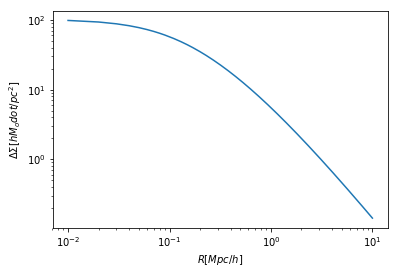

In [47]:
plt.loglog(R,DELTA,'-')
plt.xlabel(r'$R[Mpc/h]$')
plt.ylabel(r'$\Delta \Sigma [hM_odot/pc^2]$')

In [ ]:
plt.loglog